In [42]:
# needed imports
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
from sklearn.metrics import matthews_corrcoef
import phik

In [50]:
#Import Data, droping Summe and ID
X = pd.read_excel("./Data with time stemps reduced.xlsx", "Matrix without time").drop(columns=['Summe', 'ID'])
X_random = pd.read_excel("./Data with time stemps reduced.xlsx", "Matrix randomisiert").drop(columns=['ID']) 
software = list(X.columns)
X_random_transpose = X_random.transpose()

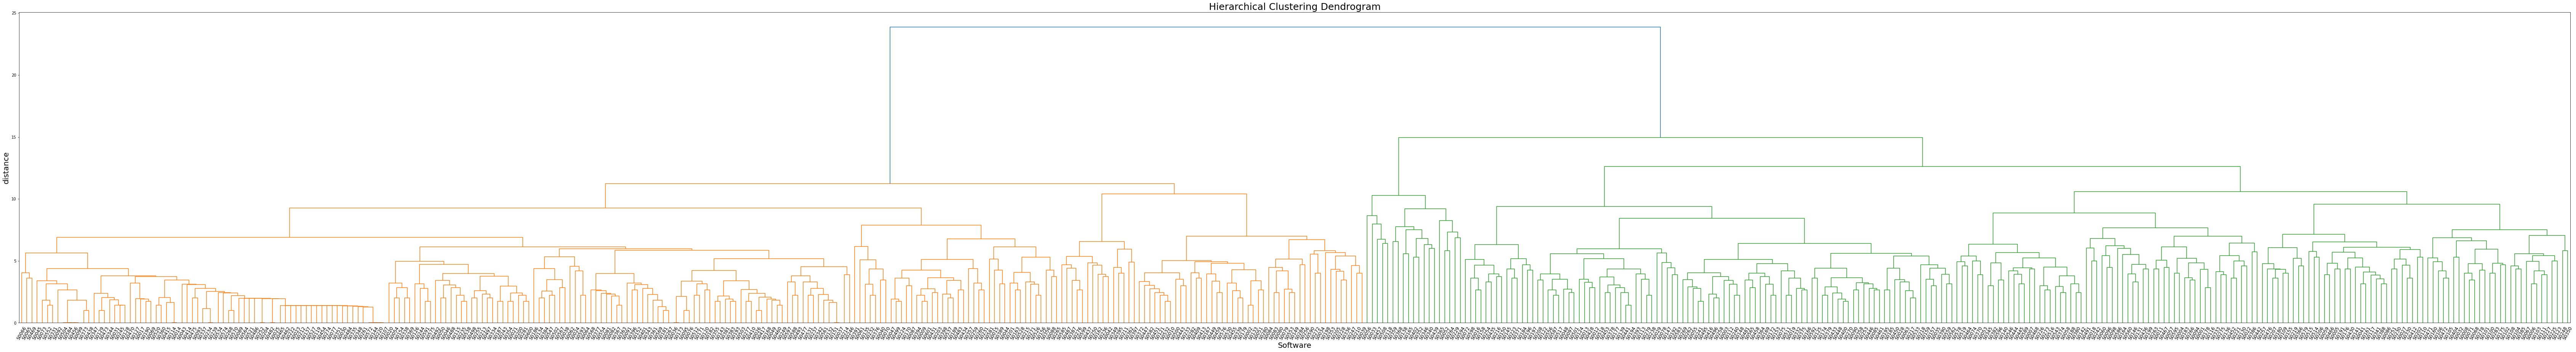

In [47]:
linked = sch.linkage(X_random_transpose, method = 'ward', metric= 'euclidean')
#labels = ["A", "B", "C", "D"]
labels = software

p = len(labels)

plt.figure(figsize=(120, 15))
plt.title('Hierarchical Clustering Dendrogram', fontsize=25)
plt.xlabel('Software', fontsize=20)
plt.ylabel('distance', fontsize=20)

# call dendrogram to get the returned dictionary 
# (plotting parameters can be ignored at this point)
R = sch.dendrogram(
                linked,
                truncate_mode='lastp',  # show only the last p merged clusters
                p=p,  # show only the last p merged clusters
                no_plot=True,
                )

# create a label dictionary
temp = {R["leaves"][ii]: labels[ii] for ii in range(len(R["leaves"]))}
def llf(xx):
    return "{}".format(temp[xx])

## This version gives you your label AND the count
# temp = {R["leaves"][ii]:(labels[ii], R["ivl"][ii]) for ii in range(len(R["leaves"]))}
# def llf(xx):
#     return "{} - {}".format(*temp[xx])

sch.dendrogram(
            linked,
            truncate_mode='lastp',  # show only the last p merged clusters
            p=p,  # show only the last p merged clusters
            leaf_label_func=llf,
            leaf_rotation=60.,
            leaf_font_size=12.,
            show_contracted=True,  # to get a distribution impression in truncated branches
            )

plt.show()

In [51]:
Y_phi = X_random.phik_matrix()

sch.dendrogram(
            Y_phi,
            truncate_mode='lastp',  # show only the last p merged clusters
            p=p,  # show only the last p merged clusters
            leaf_label_func=llf,
            leaf_rotation=60.,
            leaf_font_size=12.,
            show_contracted=True,  # to get a distribution impression in truncated branches
            )

plt.show()

interval columns not set, guessing: ['S0052', 'S0088', 'S0520', 'S0109', 'S0048', 'S0448', 'S0263', 'S0512', 'S0100', 'S0227', 'S0041', 'S0271', 'S0202', 'S0400', 'S0552', 'S0465', 'S0024', 'S0342', 'S0365', 'S0015', 'S0437', 'S0057', 'S0119', 'S0133', 'S0120', 'S0080', 'S0477', 'S0486', 'S0515', 'S0186', 'S0500', 'S0417', 'S0159', 'S0457', 'S0127', 'S0267', 'S0435', 'S0459', 'S0134', 'S0248', 'S0441', 'S0063', 'S0467', 'S0128', 'S0091', 'S0135', 'S0254', 'S0231', 'S0072', 'S0572', 'S0073', 'S0461', 'S0270', 'S0014', 'S0349', 'S0079', 'S0145', 'S0538', 'S0156', 'S0117', 'S0255', 'S0166', 'S0200', 'S0260', 'S0357', 'S0007', 'S0574', 'S0504', 'S0356', 'S0330', 'S0065', 'S0193', 'S0471', 'S0533', 'S0140', 'S0132', 'S0451', 'S0081', 'S0232', 'S0089', 'S0454', 'S0032', 'S0517', 'S0124', 'S0364', 'S0499', 'S0138', 'S0095', 'S0196', 'S0001', 'S0131', 'S0383', 'S0272', 'S0149', 'S0442', 'S0064', 'S0449', 'S0527', 'S0347', 'S0516', 'S0251', 'S0257', 'S0397', 'S0446', 'S0565', 'S0276', 'S0456', 

/Users/elisabethgoebel/opt/anaconda3/lib/python3.8/site-packages/phik/data_quality.py:69: UserWarning: Not enough unique value for variable S0227 for analysis 1. Dropping this column
  warnings.warn(
/Users/elisabethgoebel/opt/anaconda3/lib/python3.8/site-packages/phik/data_quality.py:69: UserWarning: Not enough unique value for variable S0041 for analysis 1. Dropping this column
  warnings.warn(
/Users/elisabethgoebel/opt/anaconda3/lib/python3.8/site-packages/phik/data_quality.py:69: UserWarning: Not enough unique value for variable S0007 for analysis 1. Dropping this column
  warnings.warn(
/Users/elisabethgoebel/opt/anaconda3/lib/python3.8/site-packages/phik/data_quality.py:69: UserWarning: Not enough unique value for variable S0175 for analysis 1. Dropping this column
  warnings.warn(


ValueError: Linkage matrix 'Z' must have 4 columns.

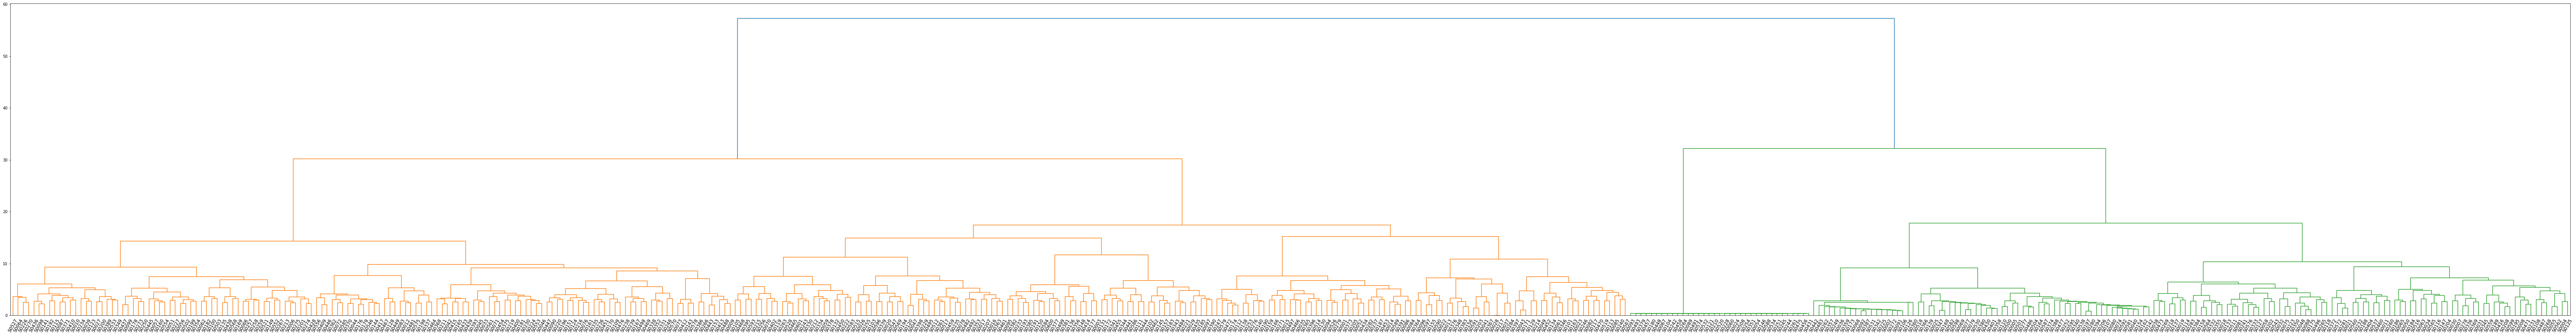

In [53]:
Z_phi = ward(Y_phi)

plt.figure(figsize=(120, 15))
sch.dendrogram(
            Z_phi,
            truncate_mode='lastp',  # show only the last p merged clusters
            p=p,  # show only the last p merged clusters
            leaf_label_func=llf,
            leaf_rotation=60.,
            leaf_font_size=12.,
            show_contracted=True,  # to get a distribution impression in truncated branches
            )

plt.show()

121278 493


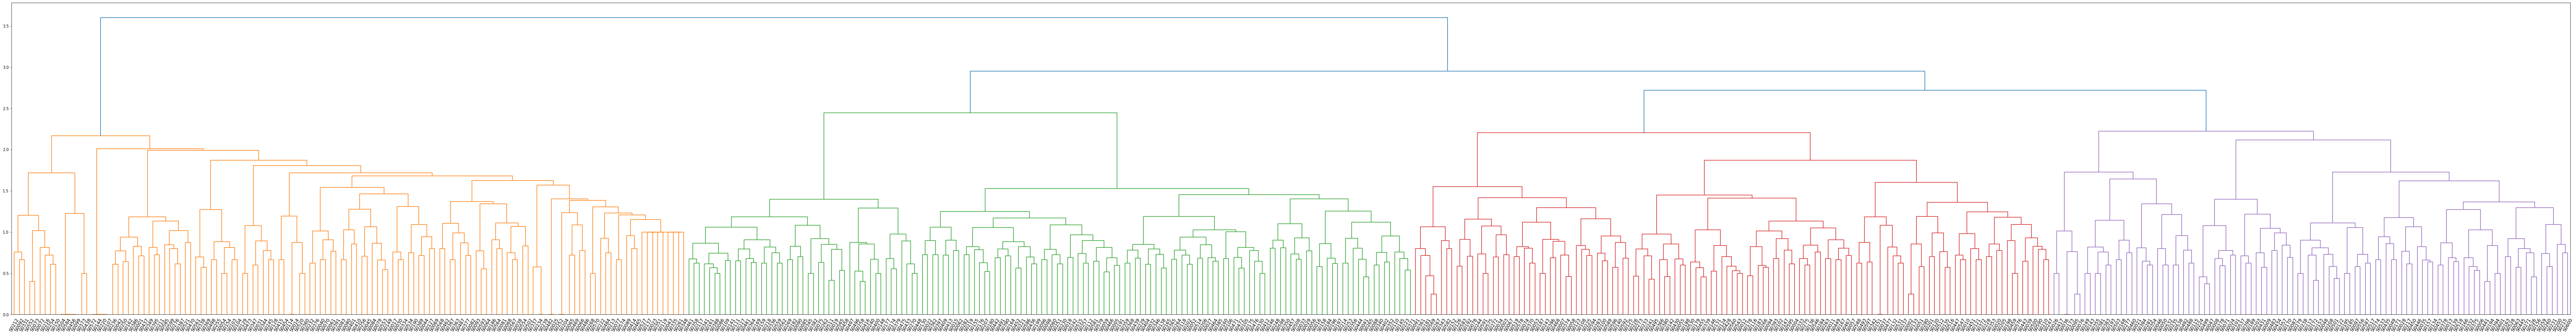

In [35]:
#Trenne Clustering von der Distanzmatrix

#Berechne Distanzmatix
Y = pdist(X_random_transpose, 'jaccard')
print(len(Y), len(X_random_transpose))

#Clustering mit ward
Z = ward(Y)

#result = fcluster(Z, 4, criterion='distance')

#Visualisierung des Clusterings
plt.figure(figsize=(120, 15))
sch.dendrogram(
            Z,
            truncate_mode='lastp',  # show only the last p merged clusters
            p=p,  # show only the last p merged clusters
            leaf_label_func=llf,
            leaf_rotation=60.,
            leaf_font_size=12.,
            show_contracted=True,  # to get a distribution impression in truncated branches
            )

plt.show()

In [40]:
# phi-coefficient
#matthews_corrcoef(X_random_transpose, X_random_transpose)

i
for i in software:
    y_true = software
    for j in range (software, 400):
        y_pred = software2
        phi = matthews_corrcoef(y_true, y_pred)
        

y_true = [+1, +1, +1, -1]
y_pred = [+1, -1, +1, +1]
matthews_corrcoef(y_true, y_pred)

NameError: name 'i' is not defined

In [ ]:
#cutree = sch.cut_tree(linked, height = )
cluster_id, cluster_level = cut_tree_balanced(linked, 20)

In [ ]:
#Cluster mit ID und zugehörigen Software als csv speichern
id_list = cluster_id.tolist()
id_list

cluster_df = pd.DataFrame(list(zip(software, cluster_id.tolist())), columns = ['Software_ID', 'Cluster_ID']).set_index('Software_ID')
cluster_df = cluster_df.sort_values(by = 'Cluster_ID')
cluster_df.transpose()
cluster_df.to_csv('cluster.csv', sep = ";")

In [ ]:
# Quelle: https://github.com/vreyespue/scipy_cut_tree_balanced/blob/master/scipy_cut_tree_balanced/util.py
# Methode um den Tree balanciert zu cutten
def cut_tree_balanced(Z, max_cluster_size):
    """
    Parameters
    ----------
    Z : ndarray
        The linkage matrix resulting from calling `ward` or `linkage`. I.e. it
        contains the hierarchical clustering encoded as a linkage matrix.
    max_cluster_size : int
        Maximum number of data samples contained within the resulting clusters.
        Thus, all resulting clusters will contain a number of data samples
        ``<= max_cluster_size``. Must be >= 1.
    Returns
    -------
    cluster_id : ndarray
        One-dimensional array of integers containing for each input sample its
        corresponding cluster id. The cluster id is an integer which is higher
        for deeper tree levels.
    cluster_level : ndarray
        One-dimensional array of integer arrays containing for each input
        sample its corresponding cluster tree level, i.e. a sequence of
        0's and 1's. Note that the cluster level is longer for deeper tree
        levels, being [0] the root cluster, [0, 0] and [0, 1] its offspring,
        and so on. Also note that in each cluster splitting, the label 0
        denotes the bigger cluster, while the label 1 denotes the smallest.
    See Also
    --------
    cut_tree
    Notes
    -----
"""
    # Assert that the input max_cluster_size is >= 1
    if not max_cluster_size >= 1:
        raise ValueError(
            "max_cluster_size should be >= 1, is: {}".format(max_cluster_size)
        )

    # Perform a full cut tree of the linkage matrix
    full_cut = cut_tree(Z)

    # Initialize the variable containing the current cluster id (it will be
    # higher for each newly found valid cluster)
    last_cluster_id = 0

    # Initialize the resulting cluster id vector (containing for each row in
    # input_data_x_sample its corresponding cluster id)
    ndim = full_cut.shape[1]
    cluster_id = np.zeros(ndim, dtype=int)

    # Initialize the resulting cluster level vector (containing for each data
    # sample its corresponding cluster tree level)
    cluster_level = np.empty((ndim,), dtype=object)
    for i in range(ndim):
        cluster_level[i] = np.array([0], int)

    # Scan the full cut matrix from the last column (root tree level) to the
    # first column (leaves tree level)
    for icol in range(ndim - 1, -1, -1):
        # Get a list of unique group ids and their count within the current
        # tree level
        values, counts = np.unique(full_cut[:, icol], return_counts=True)

        # Stop if all samples have been already selected (i.e. if all data
        # samples have been already clustered)
        if (values.size == 1) and (values[0] == -1):
            break

        # For each group id within the current tree level
        for ival in range(values.size):
            # If it is a valid group id (i.e. not yet marked with -1)
            # Note: data samples which were alredy included in a valid
            # cluster id are marked with the group id -1 (see below)
            if values[ival] >= 0:
                # Select the current group id
                selected_curr_value = values[ival]

                # Look for the vector positions (related to rows in
                # input_data_x_sample) belonging to the current group id
                selected_curr_elems = np.where(full_cut[:, icol] == selected_curr_value)

                # Major step #1: Populate the resulting vector of cluster
                # levels for each data sample, if we are not at the root
                if icol < (ndim - 1):
                    # Get the ancestor values and element positions
                    selected_ancestor_value = full_cut[
                        selected_curr_elems[0][0], icol + 1
                    ]
                    selected_ancestor_elems = np.where(
                        full_cut[:, icol + 1] == selected_ancestor_value
                    )

                    # Compute the values and counts of the offspring and sort
                    # them by their count (so that the biggest cluster gets the
                    # offspring_elem_label = 0, see below)
                    offspring_values, offspring_counts = np.unique(
                        full_cut[selected_ancestor_elems, icol], return_counts=True
                    )
                    count_sort_ind = np.argsort(-offspring_counts)
                    offspring_values = offspring_values[count_sort_ind]
                    offspring_counts = offspring_counts[count_sort_ind]

                    # If the size of the offspring is > 1
                    if offspring_values.shape[0] > 1:
                        # Select the label of the current value (i.e. 0 or 1)
                        # and append it to the cluster level
                        offspring_elem_label = np.where(
                            offspring_values == selected_curr_value
                        )[0][0]
                        for i in selected_curr_elems[0]:
                            cluster_level[i] = np.hstack(
                                (cluster_level[i], offspring_elem_label)
                            )

                # Major step #2: Populate the resulting vector of cluster ids
                # for each data sample, and mark them as clustered (-1)
                # If the number of elements is below max_cluster_size
                if counts[ival] <= max_cluster_size:
                    # Relate vector positions to the current cluster id
                    cluster_id[selected_curr_elems] = last_cluster_id

                    # Delete these vector positions at lower tree levels for
                    # further processing (i.e. mark as clustered)
                    full_cut[selected_curr_elems, 0:icol] = -1

                    # Update the cluster id
                    last_cluster_id += 1

    # Return the resulting clustering array (containing for each row in
    # input_data_x_sample its corresponding cluster id)
    return cluster_id, cluster_level